
### <center>Procesamiento Digital de Señales de Audio</center>
#### <center>Instituto de Ingeniería Eléctrica - UdelaR</center>
# Hoja de Ejercicios 2 - Curso 2022
## Introducción al procesamiento de audio.
### Filtros digitales en audio.

## Pautas para el práctico
 - La realización del presente trabajo es individual.
 - Se espera la entrega de un PDF escrito en $\LaTeX$ o similar. El mismo tendrá:
     - Máximo de 12 páginas
     - Máximo de 2500 palabras
 - También se espera la entrega del código escrito, en scripts Python o en este mismo Jupyter Notebook.
 - La corrección del práctico se hará sobre lo entregado en el PDF, pero podremos apoyarnos en el razonamiento y comprensión demostrado en el código escrito. Recomendamos escribir el código de forma prolija para facilitar la comprensión presente y futura tanto de nosotros como de ustedes mismxs.


**Nombre de el/la estudiante:** Julieta Umpierrez

### Como correr este notebook

Es posible descargarlo y correrlo localmente en su computadora

Tambien pueden correrlo en Google Colab usando el siguiente link.

<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/mrocamora/audio-dsp/blob/main/practicos/AudioDSP_Practico_2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Correr en Google Colab</a>
  </td>
</table>

In [ ]:
# Al correr esta celda, se podrá acceder a archivos
# y carpetas en su cuenta de google drive.
# Puede ver la estructura de carpetas apretando en
# el icono de carpeta de la barra lateral izquierda.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io, signal
from scipy.io.wavfile import read
from IPython.display import Audio

# Ejercicio 1

Al analizar una grabación de música con técnicas de procesamiento digital de señales, resulta de utilidad obtener una representación intermedia de la señal de audio que preserve sus principales propiedades rítmicas. Para generar tal representación, en [1] se propone descomponer la señal en bandas de frecuencia con un banco de filtros y calcular la envolvente de amplitud de la salida de cada filtro. Como forma de mostrar la validez de la propuesta, en [1] se plantea un experimento en el que al filtrar ruido blanco con el mismo banco de filtros, modular la salida de los filtros con las envolventes de amplitud previamente calculadas y sumar las señales de todas las bandas, se puede construir una nueva señal de audio que preserva las características rítmicas de la señal original.

## Parte 1


En la Figura 1 se muestra un diagrama de bloques del proceso, el cual se implementará en este ejercicio. Los pasos a seguir son los siguientes:  

---

<img src="https://github.com/mrocamora/audio-dsp/blob/main/practicos/figures/diagrama.svg?raw=1" alt="FIG 1" style="width: 600px;">

`FIG 1: Diagrama de bloques del procesamiento. Los filtros $H_1$ ... $H_n$ conforman el banco de filtros.`

---

Los pasos son los siguientes:

1. Implementar un banco de filtros Butterworth según la siguiente tabla. Se sugiere usar *scipy.signal.butter* y puede resultar útil consultar https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html


| Banda | $f_{low}$(Hz) | $f_{high}$(Hz) | tipo |
| :- | :---- | :---- | :--------------------- |
| 1 | - | 127 | pasa-bajo |
| 2 | 127 | 254 | pasa-banda |
| 3 | 254 | 508 | pasa-banda |
| 4 | 508 | 1016 | pasa-banda |
| 5 | 1016 | 2032 | pasa-banda |
| 6 | 2032 | - | pasa-alto |


2. Filtrar la señal de audio provista (*superstition.wav*) con el banco de filtros y graficar forma de onda y espectrograma de las señales resultantes.  
3. Calcular la envolvente temporal de cada una de las señales resultantes. Para ello se recomienda rectificar la señal y aplicar un filtro pasabajos.
4. Generar una señal de ruido blanco con la misma cantidad de muestras que la señal de audio y filtrarla con el banco de filtros de la parte 1.
5. Modular en amplitud las señales de ruido filtrado con las envolventes calculadas en la parte 2. Escuchar el resultado para cada una de las bandas.
6. Sumar las señales moduladas para obtener la salida y comparar auditivamente el contenido rítmico de la señal obtenida y la original.

In [ ]:
sr, data = io.wavfile.read('/content/drive/MyDrive/Colab Notebooks/audiodsp_hoja2_archivos/superstition.wav')
Audio(data, rate=sr)

Text(0.5, 0, 'tiempo')

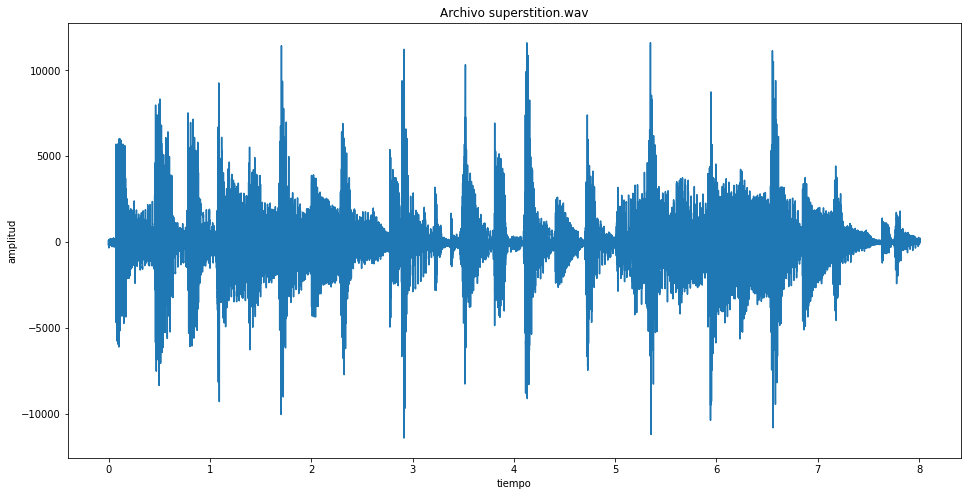

In [ ]:
time = np.linspace(0, data.shape[0] / sr, data.shape[0])
plt.figure(figsize = (16,8))
plt.plot(time,data)
plt.title('Archivo superstition.wav')
plt.ylabel('amplitud')
plt.xlabel('tiempo')

(0.0, 3500.0)

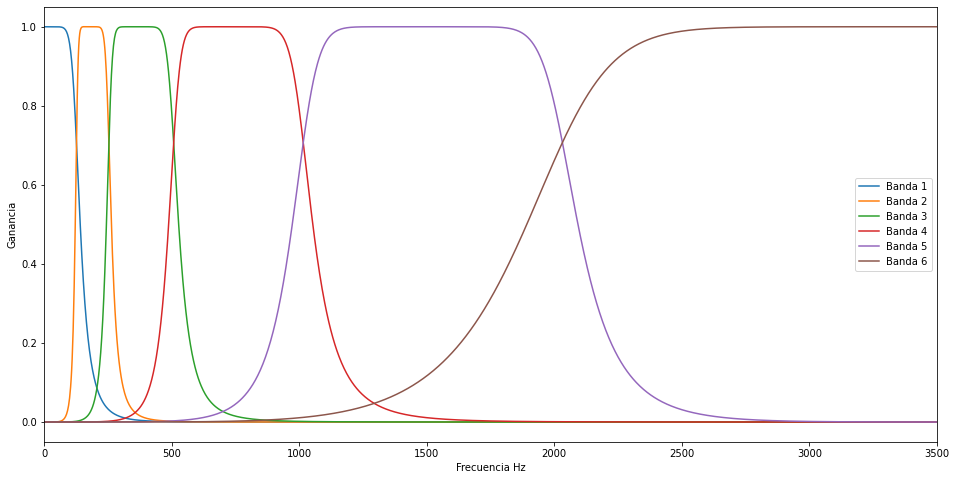

In [ ]:
#Implementacion del banco de filtros Butterworth
#Basado en https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html
from scipy.signal import butter, lfilter
from scipy.signal import freqz
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
def butter_lowpass(highcut, fs, order=5):
    nyq = 0.5 * fs
    high = highcut / nyq
    b, a = butter(order, high, btype='low')
    return b, a
def butter_highpass(lowcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = butter(order, low, btype='high')
    return b, a
fs = sr
order = 5
plt.figure(figsize = (16,8))
H1b, H1a = butter_lowpass(127, fs, order)
w, h = freqz(H1b, H1a, worN=2000)
plt.plot((fs * 0.5 / np.pi) * w, abs(h), label = 'Banda 1')
H2b, H2a = butter_bandpass(127,254, fs, order)
w, h = freqz(H2b, H2a, worN=2000)
plt.plot((fs * 0.5 / np.pi) * w, abs(h), label = 'Banda 2')
H3b, H3a = butter_bandpass(254,508, fs, order)
w, h = freqz(H3b, H3a, worN=2000)
plt.plot((fs * 0.5 / np.pi) * w, abs(h), label = 'Banda 3')
H4b, H4a = butter_bandpass(508,1016, fs, order)
w, h = freqz(H4b, H4a, worN=2000)
plt.plot((fs * 0.5 / np.pi) * w, abs(h), label = 'Banda 4')
H5b, H5a = butter_bandpass(1016,2032, fs, order)
w, h = freqz(H5b, H5a, worN=2000)
plt.plot((fs * 0.5 / np.pi) * w, abs(h), label = 'Banda 5')
H6b, H6a = butter_highpass(2032, fs, order=order)
w, h = freqz(H6b, H6a, worN=2000)
plt.plot((fs * 0.5 / np.pi) * w, abs(h), label = 'Banda 6')
plt.legend()
plt.xlabel('Frecuencia Hz')
plt.ylabel('Ganancia')
plt.xlim(0,3500)

Señal original


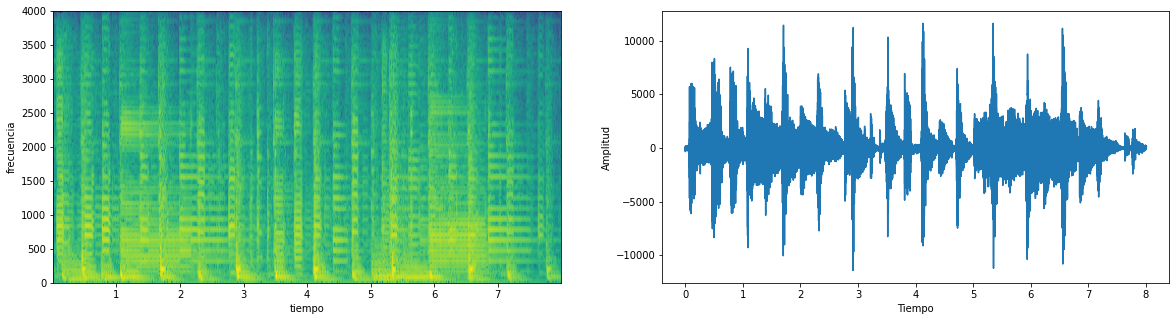

Señal filtro 1


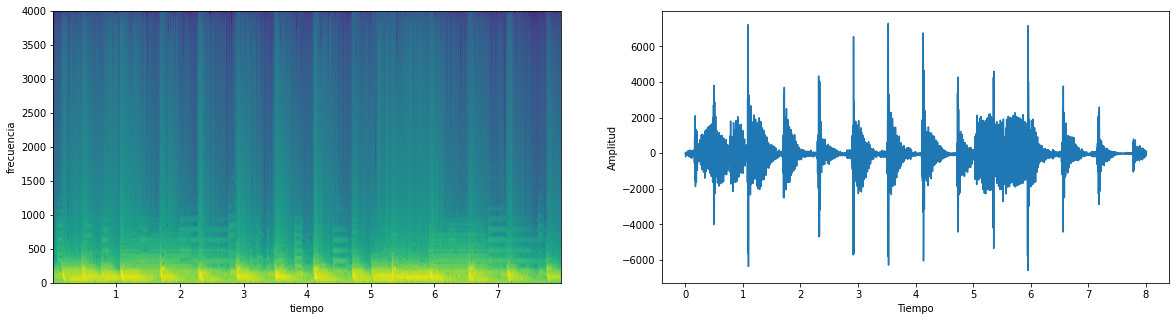

Señal filtro 2


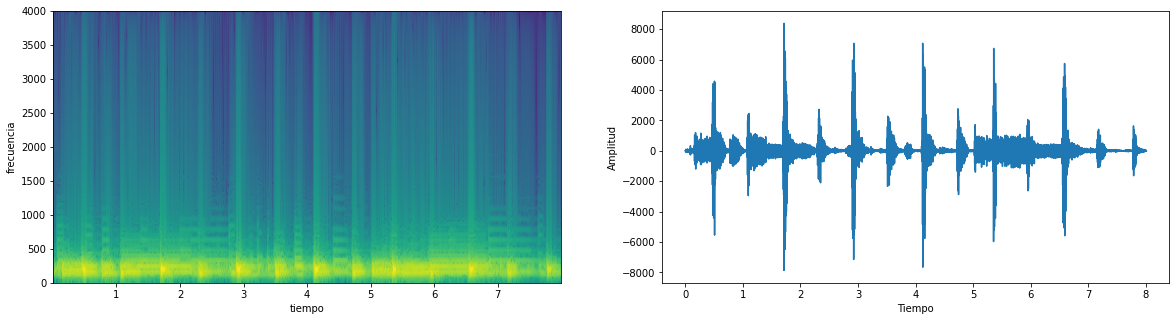

Señal filtro 3


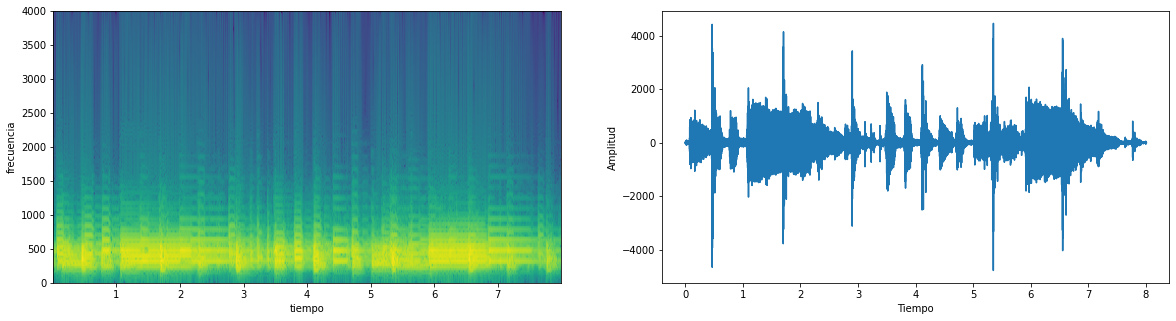

Señal filtro 4


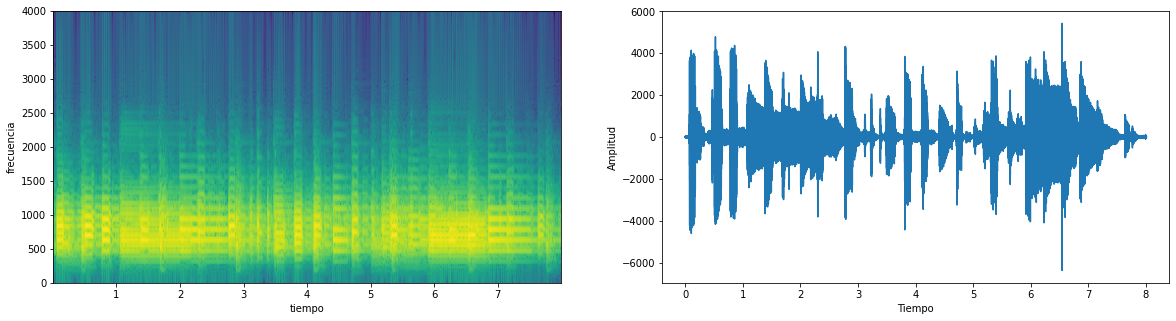

Señal filtro 5


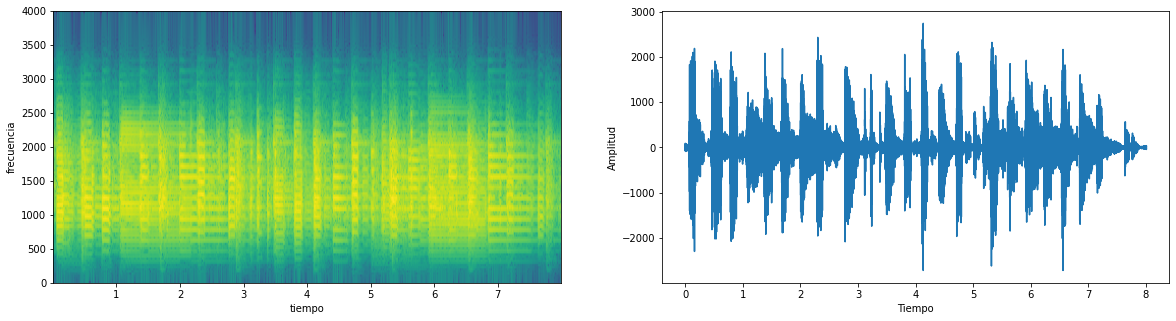

Señal filtro 6


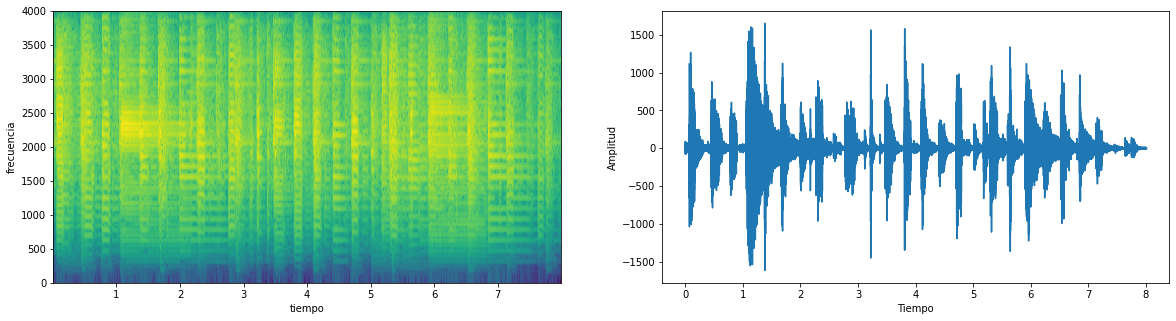

In [ ]:
#Se define una funcion que grafique la senal filtrada y su espectrograma
def graficador(y,data,sr,time):
  plt.figure(figsize = (20,5))
  plt.subplot(121)
  plt.specgram(y,Fs=sr)
  plt.xlabel('tiempo')
  plt.ylabel('frecuencia')
  plt.subplot(122)
  plt.plot(time, y)
  plt.ylabel('Amplitud')
  plt.xlabel('Tiempo')
  plt.show()
  return
print('Señal original')
graficador(data,data,sr,time)
y1 = lfilter(H1b, H1a, data)
print('Señal filtro 1')
graficador(y1,data,sr,time)
y2 = lfilter(H2b, H2a, data)
print('Señal filtro 2')
graficador(y2,data,sr,time)
y3 = lfilter(H3b, H3a, data)
print('Señal filtro 3')
graficador(y3,data,sr,time)
y4 = lfilter(H4b, H4a, data)
print('Señal filtro 4')
graficador(y4,data,sr,time)
y5 = lfilter(H5b, H5a, data)
print('Señal filtro 5')
graficador(y5,data,sr,time)
y6 = lfilter(H6b, H6a, data)
print('Señal filtro 6')
graficador(y6,data,sr,time)

In [ ]:
#Calculo de la envolvente
#Primero se rectifica y luego se filtra con un lowpass de 10hz sacado del paper
def envolvente(y, fs,order):
  rect = np.abs(y)
  b, a = butter_lowpass(10, fs, order=order)
  env = lfilter(b, a, rect)
  return env

In [ ]:
env_original = envolvente(data,fs,order)
env1 = envolvente(y1,fs,order)
env2 = envolvente(y2,fs,order)
env3 = envolvente(y3,fs,order)
env4 = envolvente(y4,fs,order)
env5 = envolvente(y5,fs,order)
env6 = envolvente(y6,fs,order)

In [ ]:
ruido = np.random.normal(0, 1, data.shape)
y1r = lfilter(H1b, H1a, ruido)
y2r = lfilter(H2b, H2a, ruido)
y3r = lfilter(H3b, H3a, ruido)
y4r = lfilter(H4b, H4a, ruido)
y5r = lfilter(H5b, H5a, ruido)
y6r = lfilter(H6b, H6a, ruido)

In [ ]:
#Modulacion en amplitud
res1 = env1*y1r
Audio(res1, rate=sr)

In [ ]:
res2 = env2*y2r
Audio(res2, rate=sr)

In [ ]:
res3 = env3*y3r
Audio(res3, rate=sr)

In [ ]:
res4 = env4*y4r
Audio(res4, rate=sr)

In [ ]:
res5 = env5*y5r
Audio(res5, rate=sr)

In [ ]:
res6 = env6*y6r
Audio(res6, rate=sr)

In [ ]:
final = res1+res2+res3+res4+res5+res6
Audio(final, rate=sr)

## Parte 2

Repita el procedimiento dividiendo el espectro en un número menor de bandas. Por ejemplo, para un total de 3 bandas, considere las bandas 1-2, 3-4 y 5-6. Compare el resultado perceptivo con el que se obtiene en la parte anterior.  

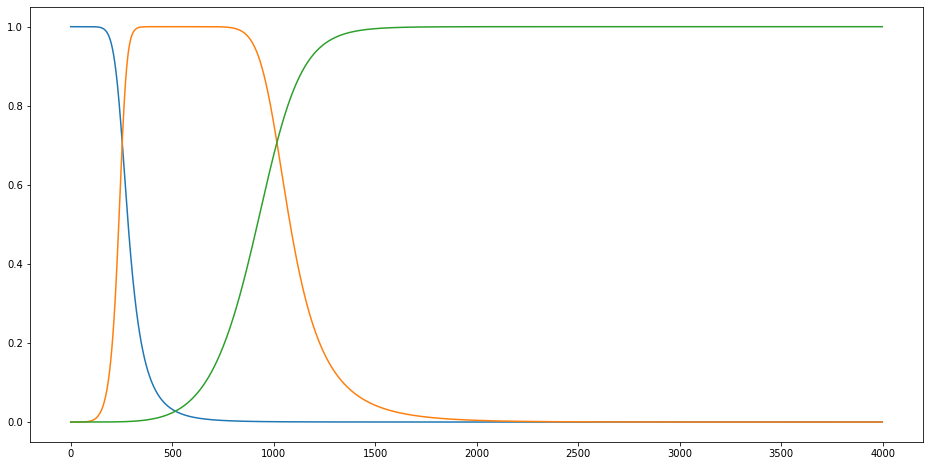

In [ ]:
plt.figure(figsize = (16,8))
H1b, H1a = butter_lowpass(254, fs, order)
w, h = freqz(H1b, H1a, worN=2000)
plt.plot((fs * 0.5 / np.pi) * w, abs(h), label = 'Banda 1')
H2b, H2a = butter_bandpass(254,1016, fs, order)
w, h = freqz(H2b, H2a, worN=2000)
plt.plot((fs * 0.5 / np.pi) * w, abs(h), label = 'Banda 2')
H3b, H3a = butter_highpass(1016, fs, order)
w, h = freqz(H3b, H3a, worN=2000)
plt.plot((fs * 0.5 / np.pi) * w, abs(h), label = 'Banda 3')

In [ ]:
y1 = lfilter(H1b, H1a, data)
y2 = lfilter(H2b, H2a, data)
y3 = lfilter(H3b, H3a, data)
env1 = envolvente(y1,fs,order)
env2 = envolvente(y2,fs,order)
env3 = envolvente(y3,fs,order)

In [ ]:
res1 = env1*y1r
Audio(res1, rate=sr)

In [ ]:
res2 = env2*y2r
Audio(res2, rate=sr)

In [ ]:
res3 = env3*y3r
Audio(res3, rate=sr)

In [ ]:
resu = res1+res2+res3
Audio(resu,rate=sr)

# Ejercicio 2

En este ejercicio se implementa el algoritmo de Karplus y Strong para síntesis de cuerda pulsada [2]. Se sugiere consultar [3] por una descripción detallada.


## Parte 1

Como primer paso se estudia la respuesta al impulso de un filtro peine.


1. Escribir la ecuación en recurrencia de un filtro peine en función del retardo $L$ y la atenuación por muestra $R$ del filtro. Indicar la frecuencia fundamental de la respuesta al impulso en función de los parámetros del filtro y la frecuencia de muestreo ¿Es posible conseguir una respuesta al impulso con frecuencia fundamental arbitraria?
2. Sintetizar las 12 notas de una octava de la *escala igualmente temperada* (en el temperamento igual se divide la octava en 12 intervalos iguales, de modo que las frecuencias de dos notas consecutivas cumplen la relación $f_{n+1} = f_{n} \, 2^{(\frac{1}{12})}$) comenzando en $220$Hz ($A3$). Para esto, se sugiere hacer lo siguiente:

     - Calcular el parámetro $L$ del filtro para que la frecuencia fundamental de la respuesta al impulso sea lo más cercana posible a la nota deseada. Utilice una frecuencia de muestreo de $f_s$ = $22050$Hz).

     - Filtrar un impulso con cada uno de los filtros diseñados.
     - Concatenar la respuesta al impulso de cada filtro para obtener una señal con todas las notas.
    

3. Variar el parámetro $R$ y analizar su efecto mediante un espectrograma.
4. Comparar el resultado obtenido con una cuerda pulsada real.

In [ ]:
fs = 22050
dur = 1
R = 0.9999

In [ ]:
def calculo_Ls(fs,f_ini):
  Ls = np.zeros(12)
  f0s = np.zeros(12)
  cant = len(Ls)
  f0s[0] = f_ini
  for i in range(cant):
    try:
      f0s[i+1] = f0s[i]*2**(1/12)
    except:
      pass
  for i in range(cant):
    Ls[i] = np.round(fs/f0s[i])
  return Ls, f0s

In [ ]:
Ls, f0s = calculo_Ls(fs,220)

In [ ]:
#Extraido de audioDSP-moorer_reverb_example.ipynb
def comb_filter(x, L, R):
    """
    comb filter

    Parameters
    ----------
    x (numpy array)   : input audio waveform
    L (int)           : delay length in samples
    R (float)         : dumping factor

    Returns
    -------
    y (numpy array) : filtered audio waveform

    """
    # signal length
    N = x.size
    # output signal
    y = np.copy(x)
    # force L to be integer
    L = int(L)

    # compute ouput from filter equation
    for n in range(L,N):
        y[n] = x[n] + R**L * y[n-L]

    return y

In [ ]:
from scipy import signal

In [ ]:
def filtrado(L,R,fs,dur):
  # time instants
  t = np.linspace(0, dur, fs*dur)
  T = len(t)
  impulso = signal.unit_impulse(T)
  y = comb_filter(impulso,L,R)
  return y

In [ ]:
y_1 = filtrado(L = Ls[0], R = R, fs = fs, dur = dur)
Audio(y_1,rate =fs)

In [ ]:
signals = y_1

In [ ]:
for i in range(1,12):
  y = filtrado(L = Ls[i], R = R, fs = fs, dur = dur)
  signals = np.concatenate((signals,y))

In [ ]:
Audio(signals,rate = fs)

Text(0, 0.5, 'frecuencia')

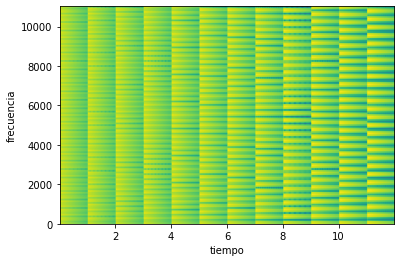

In [ ]:
plt.specgram(signals,Fs=fs)
plt.xlabel('tiempo')
plt.ylabel('frecuencia')

## Parte 2

Como primer refinamiento del modelo se incluye un filtro pasabajos en el lazo de realimentación.
En [2] se usa un filtro de media móvil de primer orden ($M=2$).


1. ¿Qué característica de la señal de una cuerda pulsada modela este filtro?
1. Calcular la ecuación en recurrencia del filtro peine incluyendo el pasabajos en el lazo de realimentación.
1. Indicar la frecuencia fundamental de la respuesta al impulso en función de los parámetros del filtro peine y la frecuencia de muestreo.
1. Repetir el punto 2 de la parte 1 con el sistema incluyendo el pasabajos.
1. Evaluar auditivamente el resultado de la síntesis al agregar el pasabajos.

In [ ]:
def calculo_Ls2(fs,f_ini):
  Ls = np.zeros(12)
  f0s = np.zeros(12)
  cant = len(Ls)
  f0s[0] = f_ini
  f0s_obt2 = np.zeros(12)
  for i in range(cant):
    try:
      f0s[i+1] = f0s[i]*2**(1/12)
    except:
      pass
  for i in range(cant):
    Ls[i] = np.round(fs/f0s[i]-1/2)
    f0s_obt2[i] = fs/(Ls[i]+1/2)
  return Ls, f0s, f0s_obt2

In [ ]:
Ls2, f0s2, f0s_obt2 = calculo_Ls2(fs,220)
print(Ls2)
print(f0s2)
print(f0s_obt2)

[100.  94.  89.  84.  79.  75.  70.  66.  63.  59.  56.  53.]
[220.         233.08188076 246.94165063 261.6255653  277.18263098
 293.66476792 311.12698372 329.62755691 349.22823143 369.99442271
 391.99543598 415.30469758]
[219.40298507 233.33333333 246.36871508 260.94674556 277.35849057
 292.05298013 312.76595745 331.57894737 347.24409449 370.58823529
 390.26548673 412.14953271]


In [ ]:
def comb_filter2(x, L, R):
    """
    comb filter

    Parameters
    ----------
    x (numpy array)   : input audio waveform
    L (int)           : delay length in samples
    R (float)         : dumping factor

    Returns
    -------
    y (numpy array) : filtered audio waveform

    """
    # signal length
    N = x.size
    # output signal
    y = np.copy(x)
    # force L to be integer
    L = int(L)

    # compute ouput from filter equation
    for n in range(L,N):
        y[n] = (1/2)*(x[n] + R**L * y[n-L] + x[n-1]+R**L*y[n-L-1])

    return y

In [ ]:
def filtrado2(L,R,fs,dur):
  # time instants
  t = np.linspace(0, dur, fs*dur)
  T = len(t)
  impulso = signal.unit_impulse(T)
  y = comb_filter2(impulso,L,R)
  return y

In [ ]:
y_12 = filtrado2(L = Ls2[0] , R = R, fs = fs, dur = dur)
Audio(y_12,rate =fs)

In [ ]:
signals2 = y_12
for i in range(1,12):
  y2 = filtrado2(L = Ls2[i], R = R, fs = fs, dur =dur)
  signals2 = np.concatenate((signals2,y2))

In [ ]:
Audio(signals2,rate = fs)

In [ ]:
from scipy.fftpack import fft,fftshift
from scipy.signal import find_peaks

In [ ]:
f0s_sin = np.zeros(12)
error_sin_pasa_todos = np.zeros(12)
for i in range(12):
  x = filtrado2(L = Ls2[i], R = R, fs = fs, dur =dur)
  NFFT=15000
  X=fftshift(fft(x,NFFT))
  fVals=np.arange(start = -NFFT/2,stop = NFFT/2)*fs/NFFT
  fVals = fVals[int(NFFT/2+1):]
  X = np.abs(X[int(NFFT/2+1):])
  peaks, _ = find_peaks(X,prominence=1)
  f0s_sin[i] = fVals[peaks[0]]
  error_sin_pasa_todos[i] = np.abs(f0s_sin[i]-f0s2[i])
print(error_sin_pasa_todos)

[0.97       0.64811924 0.01834937 0.0344347  0.64736902 1.13476792
 1.98301628 2.59244309 2.30823143 0.44557729 2.44543598 3.70469758]


## Parte 3

Como segunda etapa de refinamiento del modelo se incluye un filtro pasatodos (con un polo en \(a\) y un cero en \(1/a\)) en serie con el filtro pasabajos.

Su objetivo es crear retardos fraccionarios para producir frecuencias fundamentales arbitrarias.


1. Calcular la ecuación en recurrencia del filtro peine incluyendo el pasabajos y el pasatodos en el lazo de realimentación.
1. Indicar la frecuencia fundamental de la respuesta al impulso en función de los parámetros de los filtros peine y pasatodos, y la frecuencia de muestreo.
1. Repetir el punto 2 de la parte 1 afinando el sistema en la frecuencia exacta de las notas de la escala. En el primer paso además de calcular el parámetro \(L\) del filtro peine hay que calcular el parámetro \(a\) del filtro pasatodos.
1. Calcular experimentalmente el error (en Hz) entre la frecuencia fundamental de cada nota sintetizada y su correspondiente en la escala temperada, con y sin el uso del filtro pasatodos. ¿A qué se debe dicho error?

**Observación:** como la frecuencia fundamental de una nota no varía en el tiempo, es posible obtener una estimación bastante precisa mediante la detección del primer pico de la DFT de la señal completa de la nota.

In [ ]:
def calculo_Ls3(fs,f_ini):
  Ls = np.zeros(12)
  f0s = np.zeros(12)
  deltas = np.zeros(12)
  aes = np.zeros(12)
  cant = len(Ls)
  f0s[0] = f_ini
  f0obt = np.zeros(12)
  for i in range(cant):
    try:
      f0s[i+1] = f0s[i]*2**(1/12)
    except:
      pass
  for i in range(cant):
    Ls[i] = np.floor(fs/f0s[i]-1/2)
    deltas[i] = fs/f0s[i]-1/2 -Ls[i]
    aes[i] = (deltas[i]-1)/(deltas[i]+1)
    f0obt[i] = fs/(deltas[i]+Ls[i]+1/2)
  return Ls, f0s, aes, f0obt

In [ ]:
Ls3, f0s3, aes, f0_obt3 = calculo_Ls3(fs,220)
print(Ls3)
print(f0s3)
print(f0_obt3)
print(aes)

[99. 94. 88. 83. 79. 74. 70. 66. 62. 59. 55. 52.]
[220.         233.08188076 246.94165063 261.6255653  277.18263098
 293.66476792 311.12698372 329.62755691 349.22823143 369.99442271
 391.99543598 415.30469758]
[220.         233.08188076 246.94165063 261.6255653  277.18263098
 293.66476792 311.12698372 329.62755691 349.22823143 369.99442271
 391.99543598 415.30469758]
[-0.15789474 -0.81496742 -0.11585424 -0.12311954 -0.90396572 -0.26133943
 -0.45838051 -0.43505063 -0.22008851 -0.82566218 -0.1424296  -0.25506084]


In [ ]:
def comb_filter3(x, L, R,a):
    """
    comb filter

    Parameters
    ----------
    x (numpy array)   : input audio waveform
    L (int)           : delay length in samples
    R (float)         : dumping factor

    Returns
    -------
    y (numpy array) : filtered audio waveform

    """
    # signal length
    N = x.size
    # output signal
    y = np.copy(x)
    # force L to be integer
    L = int(L)

    # compute ouput from filter equation
    for n in range(L,N):
        y[n] = a*y[n-1]+ (1/2)*(-a*x[n]-a*R**L*y[n-L]-a*x[n-1]-a*R**L*y[n-L-1]+x[n-1]+R**L*y[n-L-1]+x[n-2]+R**L*y[n-L-2])

    return y

In [ ]:
def filtrado3(L,R,fs,dur,a):
  # time instants
  t = np.linspace(0, dur, fs*dur)
  T = len(t)
  impulso = signal.unit_impulse(T)
  y = comb_filter3(impulso,L,R,a)
  return y

In [ ]:
y_13 = filtrado3(Ls3[0] , R, fs, dur, aes[0])
Audio(y_13,rate =fs)

In [ ]:
signals3 = y_13

In [ ]:
for i in range(1,12):
  y3 = filtrado3(L = Ls3[i], R = R, fs = fs, dur = dur, a = aes[i])
  signals3 = np.concatenate((signals3,y3))

In [ ]:
Audio(signals3,rate =fs)

In [ ]:
f0s_con = np.zeros(12)
error_con_pasa_todos = np.zeros(12)
for i in range(12):
  x = filtrado3(Ls3[i] , R, fs, dur, aes[i])
  NFFT=15000
  X=fftshift(fft(x,NFFT))
  fVals=np.arange(start = -NFFT/2,stop = NFFT/2)*fs/NFFT
  fVals = fVals[int(NFFT/2+1):]
  X = np.abs(X[int(NFFT/2+1):])
  peaks, _ = find_peaks(X,prominence=1)
  f0s_con[i] = fVals[peaks[0]]
  error_con_pasa_todos[i] = np.abs(f0s_con[i] - f0s3[i])
print(error_con_pasa_todos)

[0.5        0.64811924 0.01834937 0.0344347  0.64736902 0.33523208
 0.51301628 0.34755691 0.63176857 0.44557729 0.49456402 0.70530242]


In [ ]:
x = y_13

In [ ]:
y_13 = filtrado3(f0s3[2],Ls3[2] , R, fs, dur, aes[2])
Audio(y_13,rate =fs)

[ 282  564  846 1129 1411 1694 1976 2258 2540 2822 3103 3385 3666 3947
 4227 4508 4788 5067 5346]
416.01


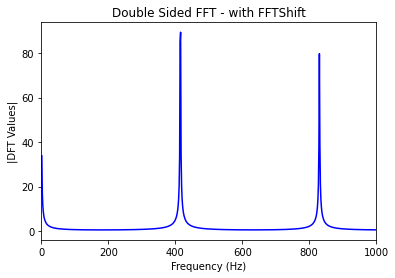

In [ ]:
NFFT=15000
X=fftshift(fft(x,NFFT))

fig4, ax = plt.subplots(nrows=1, ncols=1) #create figure handle
#X[:int(NFFT/2)+1] = 0
#X[535:] = 0
fVals=np.arange(start = -NFFT/2,stop = NFFT/2)*fs/NFFT
fVals = fVals[int(NFFT/2+1):]
X = np.abs(X[int(NFFT/2+1):])
ax.plot(fVals,np.abs(X),'b')

ax.set_title('Double Sided FFT - with FFTShift')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('|DFT Values|')
ax.set_xlim(0,1000)
#X[:int(NFFT/2)] = 0

peaks, _ = find_peaks(X,prominence=1)
print(peaks)
print(fVals[peaks[0]])

#print(fVals[np.argmax(abs(X))])

# Referencias

[1] Scheirer, Eric D, "Tempo and beat analysis of acoustic musical signals", *The Journal of the Acoustical Society of America,* vol. 103, no.1, pp.588 601, 1998.

[2] Kevin Karplus and Alex Strong, "Digital Synthesis of Plucked String and Drum Timbres", *Computer Music Journal,* vol.7, no.2, pp. 43-55, 1983.

[3] Ken Steiglitz, *Digital Signal Processing Primer: With Applications to Digital Audio and Computer Music,* ch. Comb and String Filters. Prentice Hall, 1996.
